In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('test.csv')

In [3]:
df.shape

(1459, 80)

# data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot:>

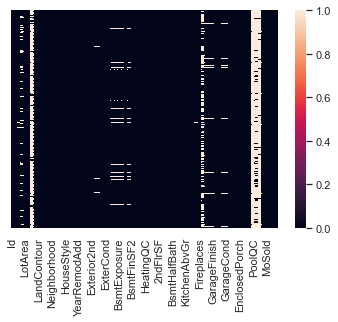

In [5]:
sns.heatmap(df.isnull(), yticklabels=False)

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
cols = df.columns
len(cols)

80

In [8]:
cols_na= []
for i in cols:
    if(df[i].isnull().any()==True):
        cols_na.append(i)

In [9]:
cols_na

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [10]:
for i in cols_na:
    print(i,'\t', df[i].isnull().sum(),'\t',df[i].dtype)

MSZoning 	 4 	 object
LotFrontage 	 227 	 float64
Alley 	 1352 	 object
Utilities 	 2 	 object
Exterior1st 	 1 	 object
Exterior2nd 	 1 	 object
MasVnrType 	 16 	 object
MasVnrArea 	 15 	 float64
BsmtQual 	 44 	 object
BsmtCond 	 45 	 object
BsmtExposure 	 44 	 object
BsmtFinType1 	 42 	 object
BsmtFinSF1 	 1 	 float64
BsmtFinType2 	 42 	 object
BsmtFinSF2 	 1 	 float64
BsmtUnfSF 	 1 	 float64
TotalBsmtSF 	 1 	 float64
BsmtFullBath 	 2 	 float64
BsmtHalfBath 	 2 	 float64
KitchenQual 	 1 	 object
Functional 	 2 	 object
FireplaceQu 	 730 	 object
GarageType 	 76 	 object
GarageYrBlt 	 78 	 float64
GarageFinish 	 78 	 object
GarageCars 	 1 	 float64
GarageArea 	 1 	 float64
GarageQual 	 78 	 object
GarageCond 	 78 	 object
PoolQC 	 1456 	 object
Fence 	 1169 	 object
MiscFeature 	 1408 	 object
SaleType 	 1 	 object


In [11]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [12]:
# Alley: Type of alley access to property

#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access

df['Alley']=df['Alley'].fillna("No_alley")

In [13]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [14]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [15]:
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches)
#        NA	No Basement
df['BsmtQual']=df['BsmtQual'].fillna("No_Basement")

In [16]:
# BsmtCond: Evaluates the general condition of the basement

#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement
df['BsmtCond']=df['BsmtCond'].fillna("No_Basement")

In [17]:
# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure
#        NA	No Basement
df['BsmtExposure']=df['BsmtExposure'].fillna("No_Basement")

In [18]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna("No_Basement")
df['BsmtFinType2']=df['BsmtFinType2'].fillna("No_Basement")

In [19]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

In [20]:
# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace
df['FireplaceQu']=df['FireplaceQu'].fillna("No_Fireplace")

In [21]:
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage
df['GarageType']=df['GarageType'].fillna("No_Garage")

In [22]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])

In [23]:
df['GarageQual']=df['GarageQual'].fillna("No_Garage")

In [24]:
df['GarageCond']=df['GarageCond'].fillna("No_Garage")

In [25]:
df['GarageFinish']=df['GarageFinish'].fillna("No_Garage")

In [26]:
# PoolQC: Pool quality
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool
df['PoolQC']=df['PoolQC'].fillna("No_Pool")

In [27]:
df['Fence']=df['Fence'].fillna("No_Fence")

In [28]:
# MiscFeature: Miscellaneous feature not covered in other categories
		
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF)
#        TenC	Tennis Court
#        NA	None

df['MiscFeature']=df['MiscFeature'].fillna("None")

In [29]:
df['MSZoning']=df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [30]:
df['Utilities']=df['Utilities'].fillna(df['Utilities'].mode()[0])

In [31]:
df['Exterior1st']=df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd']=df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])

In [32]:
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())

In [33]:
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean())
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mean())
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mean())

In [34]:
df['KitchenQual']=df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])

In [35]:
df['Functional']=df['Functional'].fillna(df['Functional'].mode()[0])

In [36]:
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mean())
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mean())

In [37]:
df['SaleType']=df['SaleType'].fillna(df['SaleType'].mode()[0])

<AxesSubplot:>

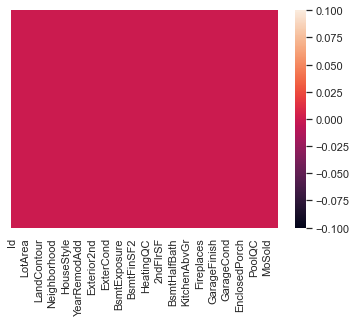

In [38]:
sns.heatmap(df.isnull(), yticklabels=False)

In [41]:
df.drop(['Id'],axis=1,inplace=True)

In [42]:
df.shape

(1459, 79)

In [43]:
df.to_csv('test_processed.csv',index=False)